# Uncovering Consumer Patterns: Association Rule Mining on Iowa Liquor Sales Data (USA)

- Full name: **Tam Nguyen Bang**
- Student ID: **475308**

- *1st Year Master's Student of Data Science and Business Analytics*

- *Faculty of Economic Sciences, University of Warsaw*

# Table of content

1. Project Motivation

  Literature Review
  
  Executive Summary
  
  Required libraries
  
2. Dataset information

  2.1. Load & cleanse raw data
  
  2.2. Exploratory Data Analysis(EDA)
  
  2.3. Data Engineering & Deeply Analyzing
      
      Step 1. Select user_ids who have >2 reviews --> filter records with NULL main_category and reviews in last 3 years
      
      Step 2. First look of selected sample
      
      Step 3. Select the city which has the most orders --> city='DES MOINES'
      
      Step 4. Generate basket market data
      
3. Appriori algorithm analysis in category name

  3.1. Choices of Support & Confidence value
  
  3.2. Frequent Itemsets with Incomplete Antecedent and Consequent Information
  
  3.3. Execute the chose rule
  
  3.4. Visualize executed rules
  
4. Conclusion

5. References



# 1. Project Motivation

### Literature Review
The liquor industry is a significant economic driver, generating substantial revenue and contributing to public funds through taxes and licensing fees. Its products are deeply tied to cultural practices, lifestyle choices, and social behaviors, providing a rich area for understanding buying patterns, emerging trends, and regional preferences. Moreover, liquor consumption has critical public policy and health implications, informing regulations and educational initiatives to balance economic growth with public well-being. Businesses benefit from this analysis by optimizing inventory, designing targeted promotions, and enhancing customer experiences in a highly competitive market. Analyzing liquor consumption offers valuable insights into consumer behavior, market dynamics, and societal impacts, making it a compelling focus for study.


The study of consumer behavior in the liquor industry is a multifaceted domain that intersects with economics, public health, and data analytics. Previous research, such as Fitzgerald and Mulford’s (1992) investigation into the impact of Iowa’s liquor privatization, revealed that despite a dramatic increase in availability, the long-term effect on consumption remained negligible. Their findings challenged the conventional assumption that increased access invariably leads to higher consumption and highlighted the role of cultural, economic, and regulatory factors in shaping drinking behaviors​.
​

Exploratory analyses of the Iowa Liquor Sales dataset have demonstrated the utility of detailed transactional data in uncovering insights into revenue patterns, regional preferences, and product profitability. Reports from Rakam.io further illustrate the potential of this dataset to identify trends such as the dominance of Polk County in revenue generation and the significant profitability of whiskey and vodka​.


The dataset's granularity, spanning multiple years and regions within Iowa, makes it particularly suitable for analyzing both macro and microeconomic trends. Prior studies, including those by Fitzgerald and Mulford (1992), underscore the role of privatization and increased availability on consumption behaviors, demonstrating the nuanced effects of policy changes on alcohol consumption. Additionally, the dataset highlights the economic significance of specific categories such as whiskey, vodka, and rum, which consistently emerge as top contributors to state profits. The findings aim to support both businesses in refining retail strategies and policymakers in crafting balanced regulations that address economic and public health priorities.


The study of consumer behavior in the liquor industry is a multifaceted domain that intersects with economics, public health, and data analytics. Previous research, such as Fitzgerald and Mulford’s (1992) investigation into the impact of Iowa’s liquor privatization, revealed that despite a dramatic increase in availability, the long-term effect on consumption remained negligible. Their findings challenged the conventional assumption that increased access invariably leads to higher consumption and highlighted the role of cultural, economic, and regulatory factors in shaping drinking behaviors​.

### Executive Summary

In summary, the intersection of data analytics and liquor sales analysis provides a rich area for research. By building on existing literature and leveraging advanced methodologies, this analysis integrates rigorous data exploration with association rule mining, enabling a comprehensive understanding of consumer behavior and its implications for the dynamic liquor retail market in Iowa.

Analyzing liquor consumption through Market Basket Analysis (MBA) offers a powerful approach to uncovering hidden patterns in purchasing behavior and associations between products. The liquor industry, as a significant economic and cultural sector, presents an ideal context for applying MBA techniques to extract actionable insights from transactional data. By identifying frequently co-purchased items, such as spirits and mixers or complementary categories, businesses can design targeted promotions, optimize inventory, and improve product placement to enhance the customer experience. Additionally, the analysis provides valuable information on regional preferences and emerging trends, offering a deeper understanding of consumer choices. This data-driven approach also supports policymakers and researchers in crafting regulations or initiatives that address public health concerns while fostering economic growth. In this project, leveraging MBA to analyze liquor sales not only advances knowledge of consumer behavior but also demonstrates the potential of association rule mining to inform decision-making in a dynamic, regulated industry.

### Required libraries

In [8]:
import gzip
import json
import pandas as pd
import polars as pl
import seaborn as sns
import datetime
import pandas as pd
import gc
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from scipy.signal import find_peaks
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
from google.colab import drive
file_path = '/content/unstacked_liquor_basket_desmoines.parquet'
df = pd.read_parquet(file_path)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Dataset information

Understanding consumer purchasing behavior is crucial for businesses aiming to optimize product offerings and enhance customer satisfaction. This project, *Uncovering Consumer Patterns: Association Rule Mining on Iowa Liquor Sales Data*, leverages the extensive dataset provided by the Iowa Department of Commerce, Alcoholic Beverages Division, to identify significant associations between liquor products purchased across the state.

**Dataset Overview**

The dataset encompasses spirits purchase information from Iowa Class “E” liquor licensees—such as grocery stores, liquor stores, and convenience stores—detailing transactions from January 1, 2012, to the present.

Each record includes:
* Date of purchase
* Store information (number, name, address, city, zip code, county)
* Category and vendor details
* Item specifics (number, description, pack, bottle volume)
* Financials (state bottle cost, state bottle retail, sales in dollars)
* Quantities (bottles sold, volume sold in liters and gallons)

This rich dataset facilitates a comprehensive analysis of liquor sales trends and consumer preferences at a granular level.


The dataset is publicly accessible and can be downloaded from the Iowa Data Portal: https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy/about_data.

Rows: 30.8M, Columns: 24, Each row is an individual product purchase.

<section id="schema-column-preview" data-testid="schema-column-preview" class="landing-page-section">
  <forge-card>
    <forge-scaffold>
      <h3 slot="header" class="landing-page-section-header">Dataset Columns (24)</h3>
      <div slot="body">
        <div class="schema-column-preview-table">
          <forge-table select="false" multiselect="true" dense="false" roomy="false" filter="false">
            <table class="forge-table">
              <thead>
                <tr class="forge-table-row forge-table-head__row">
                  <th scope="col" class="forge-table-cell forge-table-head__cell forge-table-head__cell--sortable">
                      <span class="forge-table-head__cell-text">Column Name</span>
                      <forge-icon name="arrow_downward" class="forge-table-head__cell-sort-icon"></forge-icon>
                      <span class="forge-table-head__cell__sort-order--hidden forge-table-head__cell__sort-order"></span>
                  </th>
                  <th scope="col" class="forge-table-cell forge-table-head__cell">
                    <div class="forge-table-head__cell-container">
                      <span class="forge-table-head__cell-text">Description</span>
                    </div>
                  </th>
                  <th scope="col" class="forge-table-cell forge-table-head__cell forge-table-head__cell--sortable">
                      <span class="forge-table-head__cell-text">API Field Name</span>
                      <forge-icon name="arrow_downward" class="forge-table-head__cell-sort-icon"></forge-icon>
                      <span class="forge-table-head__cell__sort-order--hidden forge-table-head__cell__sort-order"></span>
                  </th>
                  <th scope="col" class="forge-table-cell forge-table-head__cell forge-table-head__cell--sortable">
                      <span class="forge-table-head__cell-text">Data Type</span>
                      <forge-icon name="arrow_downward" class="forge-table-head__cell-sort-icon"></forge-icon>
                      <span class="forge-table-head__cell__sort-order--hidden forge-table-head__cell__sort-order"></span>
                  </th>
                </tr>
              </thead>
              <tbody>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Invoice/Item Number</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Concatenated invoice and line number associated with the liquor order.  This provides a unique identifier for the individual liquor products included in the store order</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>invoice_line_no</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="calendar_clock"></forge-icon>
                          <span>Date</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Date of order</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>date</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/floating_timestamp.html" target="_blank" rel="noreferrer">Floating Timestamp</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Store Number</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Unique number assigned to the store who ordered the liquor.</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>store</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Store Name</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Name of store who ordered the liquor.</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>name</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Address</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Address of store who ordered the liquor.</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>address</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>City</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>City where the store who ordered the liquor is located</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>city</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Zip Code</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Zip code where the store who ordered the liquor is located</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>zipcode</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="map_marker_outline"></forge-icon>
                          <span>Store Location</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3;">
                              <div>Location of store who ordered the liquor. The Address, City, State and Zip Code are geocoded to provide geographic coordinates. Accuracy of geocoding is dependent on how well the address is interpreted and the completeness of the reference data used. Left NULL where unable to provide point location.</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>store_location</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/point.html" target="_blank" rel="noreferrer">Point</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>County Number</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Iowa county number for the county where store who ordered the liquor is located </div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>county_number</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>County</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>County where the store who ordered the liquor is located </div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>county</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Category</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Category code associated with the liquor ordered</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>category</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Category Name</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Category of the liquor ordered.</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>category_name</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Vendor Number</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>The vendor number of the company for the brand of liquor ordered</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>vendor_no</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Vendor Name</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>The vendor name of the company for the brand of liquor ordered</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>vendor_name</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row">
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-name-cell">
                          <forge-icon slot="undefined" name="text_fields"></forge-icon>
                          <span>Item Number</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-expandable-wrapper">
                          <div class="expandable-text-section forge-typography--body1 description-expandable-text-section">
                            <div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;">
                              <div>Item number for the individual liquor product ordered.</div>
                            </div>
                          </div>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-field-name-cell">
                          <span>itemno</span>
                        </div>
                      </div>
                    </div>
                  </td>
                  <td class="forge-table-cell forge-table-body__cell">
                    <div class="forge-table-cell__container" data-cell-template="">
                      <div>
                        <div class="schema-column-data-type-cell">
                          <a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a>
                        </div>
                      </div>
                    </div>
                  </td>
                </tr>
                <tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="text_fields"></forge-icon><span>Item Description</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Description of the individual liquor product ordered.</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>im_desc</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>Pack</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>The number of bottles in a case for the liquor ordered</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>pack</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>Bottle Volume (ml)</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Volume of each liquor bottle ordered in milliliters.</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>bottle_volume_ml</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>State Bottle Cost</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>The amount that Alcoholic Beverages Division paid for each bottle of liquor ordered</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>state_bottle_cost</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>State Bottle Retail</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>The amount the store paid for each bottle of liquor ordered</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>state_bottle_retail</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>Bottles Sold</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>The number of bottles of liquor ordered by the store</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>sale_bottles</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>Sale (Dollars)</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Total cost of liquor order (number of bottles multiplied by the state bottle retail)</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>sale_dollars</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>Volume Sold (Liters)</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Total volume of liquor ordered in liters.  (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000)</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>sale_liters</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon slot="undefined" name="pound"></forge-icon><span>Volume Sold (Gallons)</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Total volume of liquor ordered in gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784)</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>sale_gallons</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr>
              </tbody>
            </table>
          </forge-table>
        </div>
        <div class="table-paginator">
          <forge-paginator page-size="15" pagesize="15" total="24"></forge-paginator>
        </div>
      </div>
    </forge-scaffold>
  </forge-card>
</section>

In [10]:
pd.set_option('display.max_colwidth', None)

# Apply the default theme
sns.set_theme(
    style="whitegrid",
    palette="muted",
    context="notebook",
    rc={
        "axes.labelsize": 14,
        "axes.titlesize": 16,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "lines.linewidth": 2,
        "figure.figsize": (10, 6)
    }
)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.1. Load & cleanse raw data

Load raw dataset & its metadata

In [13]:
raw_df = pl.read_csv(r"/content/drive/MyDrive/Iowa_Liquor_Sales_2020.csv"\
            ,columns=['invoice_line_no', 'date', 'name', 'city', 'category', 'category_name', 'itemno', 'im_desc']\
                  ,schema_overrides= {'invoice_line_no': pl.String,\
                                        'date': pl.Datetime,\
                                        'store': pl.String,\
                                        'name': pl.String,\
                                        'address': pl.String,\
                                        'city': pl.String,\
                                        'zipcode': pl.String,\
                                        'store_location': pl.String,\
                                        'county_number': pl.String,\
                                        'county': pl.String,\
                                        'category': pl.String,\
                                        'category_name': pl.String,\
                                        'vendor_no': pl.String,\
                                        'vendor_name': pl.String,\
                                        'itemno': pl.String,\
                                        'im_desc': pl.String,\
                                        'pack': pl.Int32,\
                                        'bottle_volume_ml': pl.Float32,\
                                        'state_bottle_cost': pl.Float32,\
                                        'state_bottle_retail': pl.Float32,\
                                        'sale_bottles': pl.Float32,\
                                        'sale_dollars': pl.Float32,\
                                        'sale_liters': pl.Float32,\
                                        'sale_gallons': pl.Float32}\
                  ,null_values='store_location'\
                  ,ignore_errors=True\
                  ,n_threads=4)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##2.2. Exploratory Data Analysis(EDA)
Descriptive statistics about the dataset

In [14]:
raw_df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


statistic,invoice_line_no,date,name,city,category,category_name,itemno,im_desc
str,str,str,str,str,str,str,str,str
"""count""","""13032174""","""13032174""","""13032174""","""13028454""","""13031492""","""13031492""","""13032174""","""13032174"""
"""null_count""","""0""","""0""","""0""","""3720""","""682""","""682""","""0""","""0"""
"""mean""",null,"""2022-07-05 16:27:02.345189""",null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null
"""min""","""INV-24289200001""","""2020-01-02 00:00:00""","""'DA BOOZE BARN / WEST BEND""","""ACKLEY""","""1011000.0""","""100% AGAVE TEQUILA""","""100015""","""10TH MOUNTAIN AMERICAN SINGLE …"
"""25%""",null,"""2021-04-05 00:00:00""",null,null,null,null,null,null
"""50%""",null,"""2022-07-12 00:00:00""",null,null,null,null,null,null
"""75%""",null,"""2023-10-03 00:00:00""",null,null,null,null,null,null
"""max""","""RINV-05584000110""","""2024-12-31 00:00:00""","""ZAPF'S PRONTO MARKET""","""ZWINGLE""","""1901200.0""","""WHITE RUM""","""999996""","""ZYR VODKA"""


In [15]:
raw_df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


statistic,invoice_line_no,date,name,city,category,category_name,itemno,im_desc
str,str,str,str,str,str,str,str,str
"""count""","""13032174""","""13032174""","""13032174""","""13028454""","""13031492""","""13031492""","""13032174""","""13032174"""
"""null_count""","""0""","""0""","""0""","""3720""","""682""","""682""","""0""","""0"""
"""mean""",null,"""2022-07-05 16:27:02.345189""",null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null
"""min""","""INV-24289200001""","""2020-01-02 00:00:00""","""'DA BOOZE BARN / WEST BEND""","""ACKLEY""","""1011000.0""","""100% AGAVE TEQUILA""","""100015""","""10TH MOUNTAIN AMERICAN SINGLE …"
"""25%""",null,"""2021-04-05 00:00:00""",null,null,null,null,null,null
"""50%""",null,"""2022-07-12 00:00:00""",null,null,null,null,null,null
"""75%""",null,"""2023-10-03 00:00:00""",null,null,null,null,null,null
"""max""","""RINV-05584000110""","""2024-12-31 00:00:00""","""ZAPF'S PRONTO MARKET""","""ZWINGLE""","""1901200.0""","""WHITE RUM""","""999996""","""ZYR VODKA"""


1. Invoice Data:


Count: The dataset includes 30,767,347 invoices, making it highly comprehensive and valuable for trend analysis.

Unique Identifiers: Each invoice is uniquely labeled with no null values, ensuring accurate transaction tracking.

Date Range: The records span from January 2, 2012, to December 12, 2024. This long timeframe enables robust analysis


2. Store Data:

Store Names: The dataset includes 307,833 unique store names, offering detailed geographic segmentation across Iowa.

Cities: Sales data is captured from 83,511 unique city entries, which allows for regional analysis to identify top-performing locations or underserved areas.

3. Categories and Products:

Categories: There are 16,974 unique liquor categories, ranging from common types like "100 Proof Vodka" to niche categories like "White Rum."

Product Descriptions: The dataset contains 25,040 unique item descriptions, enabling brand-level or product-specific insights.

4. Improvement:

Approximately 1.8 million records lack date entries, which may need imputation or exclusion from certain analyses.

Outliers: Although not directly visible here, potential data irregularities such as extreme values or inconsistencies in categorical entries should be investigated.

In summary, this comprehensive dataset is well-suited for advanced analytics such as MBA offering significant potential for actionable insights in Iowa's liquor retail sector.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='date', ylabel='Count'>

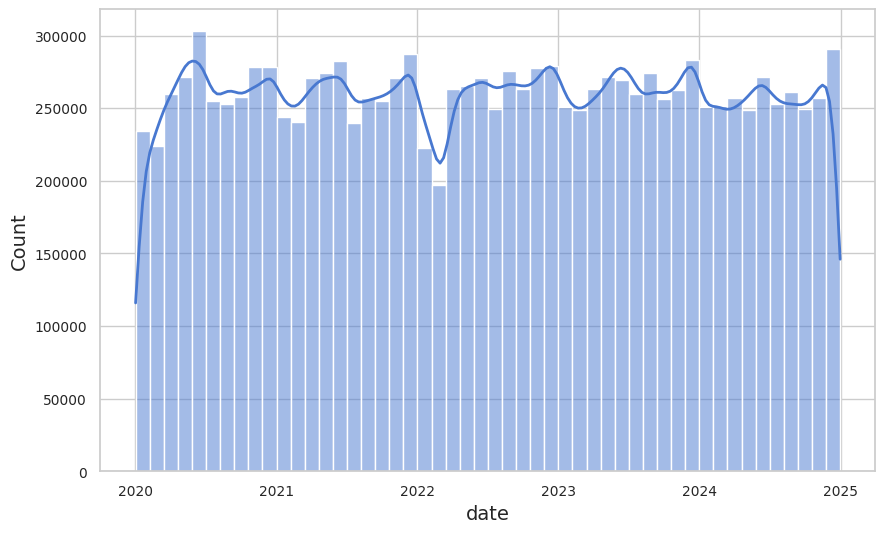

In [16]:
num_invoice = raw_df.group_by('invoice_line_no', 'date').agg(pl.n_unique('invoice_line_no').alias('num_invoice'))

sns.histplot(num_invoice, x="date", bins=50, kde=True)

## 2.3. Data Engineering & Deeply Analyzing

It is a need to dive into this dataset for more understanding and do several cleansing & transforming steps to retrieve the well-structured input for MBA.


#### Step 1. Select user_ids who have >2 reviews --> filter records with NULL main_category and reviews in last 3 years


In [22]:
raw_df = pl.read_parquet("/content/liquor_egreater2020.parquet")
raw_df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


statistic,invoice_line_no,date,name,city,category,category_name,itemno,im_desc
str,str,str,str,str,str,str,str,str
"""count""","""5095576""","""5095576""","""5095576""","""5094503""","""5095309""","""5095309""","""5095576""","""5095576"""
"""null_count""","""0""","""0""","""0""","""1073""","""267""","""267""","""0""","""0"""
"""mean""",null,"""2022-06-28 11:42:10.863635""",null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null
"""min""","""INV-24289200001""","""2020-01-04 00:00:00""","""'DA BOOZE BARN / WEST BEND""","""ACKLEY""","""1011100""","""100% AGAVE TEQUILA""","""100015""","""10TH MOUNTAIN AMERICAN SINGLE …"
"""25%""",null,"""2021-04-02 00:00:00""",null,null,null,null,null,null
"""50%""",null,"""2022-07-06 00:00:00""",null,null,null,null,null,null
"""75%""",null,"""2023-10-02 00:00:00""",null,null,null,null,null,null
"""max""","""RINV-05554500191""","""2024-12-12 00:00:00""","""ZAPF'S PRONTO MARKET""","""ZWINGLE""","""1901200""","""WHITE RUM""","""999996""","""ZYR VODKA"""


#### Step 2. First look of selected sample

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique city:  477
shape: (10, 2)
┌─────────────────┬─────────────┐
│ city            ┆ num_invoice │
│ ---             ┆ ---         │
│ str             ┆ u32         │
╞═════════════════╪═════════════╡
│ DES MOINES      ┆ 416043      │
│ CEDAR RAPIDS    ┆ 330347      │
│ DAVENPORT       ┆ 208576      │
│ WEST DES MOINES ┆ 167606      │
│ WATERLOO        ┆ 149663      │
│ SIOUX CITY      ┆ 146424      │
│ COUNCIL BLUFFS  ┆ 145154      │
│ AMES            ┆ 123971      │
│ IOWA CITY       ┆ 120185      │
│ ANKENY          ┆ 119476      │
└─────────────────┴─────────────┘


<ipython-input-23-92b5f7a6d130>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=raw_df.group_by('city').agg(pl.n_unique('invoice_line_no').alias('num_invoice')).sort('num_invoice', descending=True)[:10]


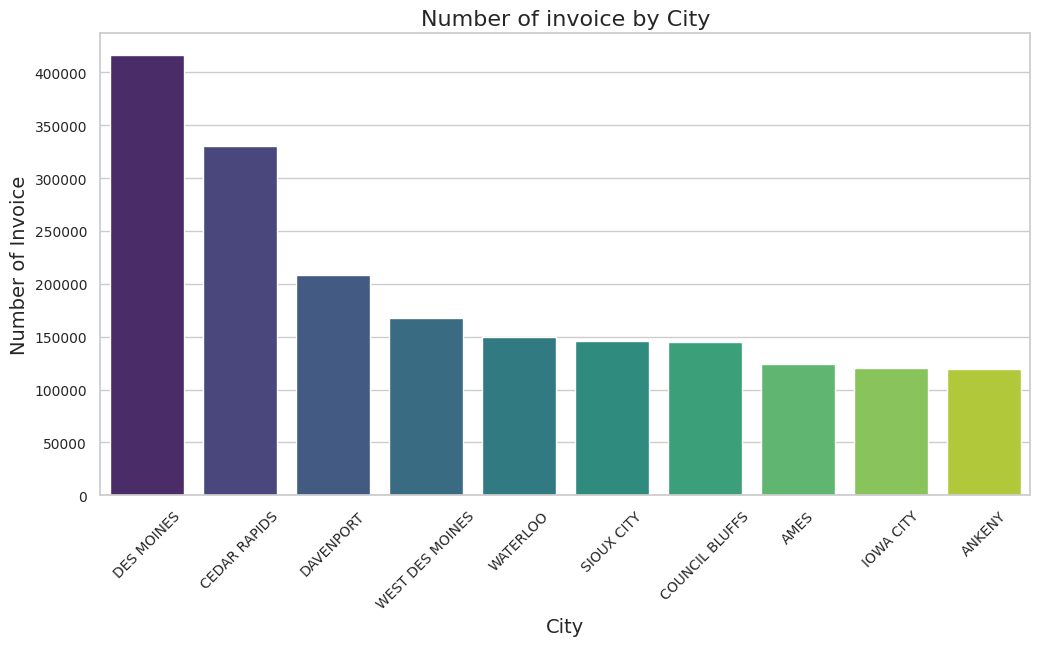

In [23]:
print("Number of unique city: ", raw_df['city'].n_unique())

print(raw_df.group_by('city').agg(pl.n_unique('invoice_line_no').alias('num_invoice')).sort('num_invoice', descending=True)[:10])

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=raw_df.group_by('city').agg(pl.n_unique('invoice_line_no').alias('num_invoice')).sort('num_invoice', descending=True)[:10]
                  , x="city", y="num_invoice", palette="viridis")
plt.title("Number of invoice by City")
plt.xlabel("City")
plt.ylabel("Number of Invoice")
plt.xticks(rotation=45)
plt.show()

From an overall aspect, the bar chart illustrates the number of invoices by city in Iowa, highlighting significant variations in liquor sales activity across regions. Des Moines leads by a substantial margin, followed by Cedar Rapids and Davenport, indicating these cities are key markets for liquor sales in the state. Other cities, such as West Des Moines, Waterloo, and Sioux City, show moderate sales volumes, while cities like Ames, Iowa City, and Ankeny contribute comparatively less.

This distribution reflects both population density and economic activity, making Des Moines a focal point for targeted marketing and inventory strategies.

#### Step 3. Select the city which has the most orders --> city='DES MOINES'

- Plotting for better visualizing the frequency values of given features

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-1e762d3871d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=orders_by_day_of_week, x="day_of_week", y="num_orders", palette="viridis")


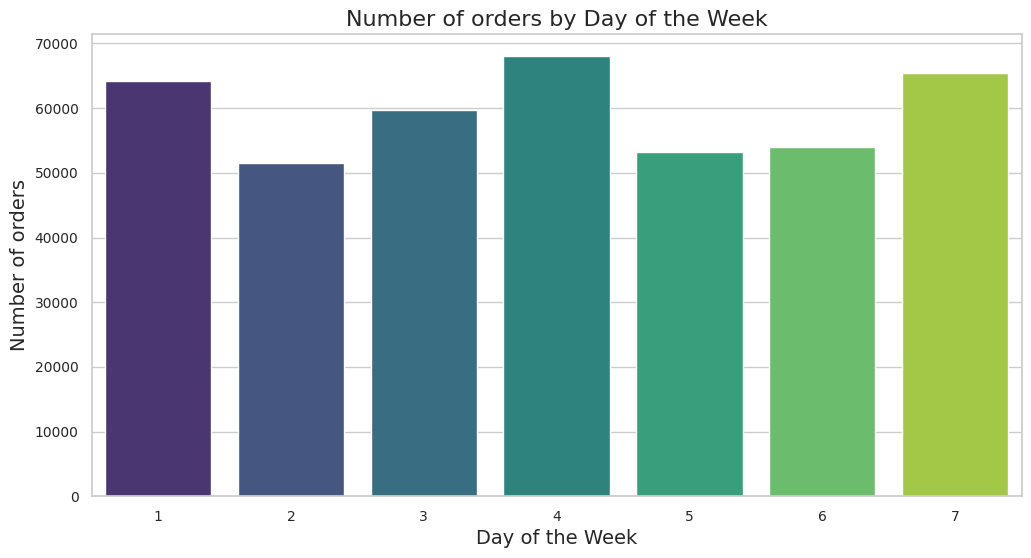

<ipython-input-24-1e762d3871d8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=orders_by_month, x="month", y="num_orders", palette="viridis")


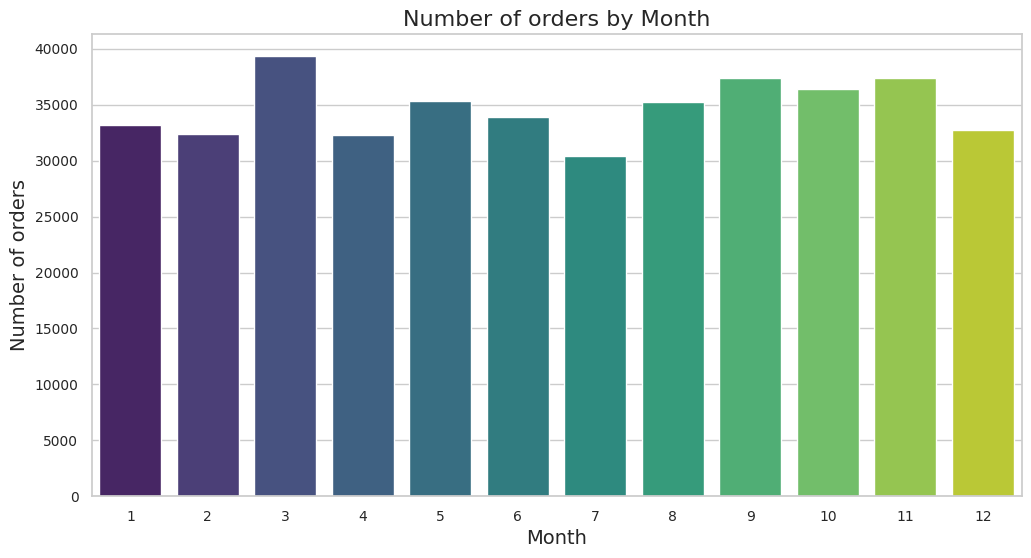

In [24]:
raw_des_moines_df = raw_df.filter(pl.col("city")=='DES MOINES')

raw_des_moines_df = raw_des_moines_df.with_columns([
    pl.col("date").dt.weekday().alias("day_of_week"),
    pl.col("date").dt.month().alias("month")
])

orders_by_day_of_week = raw_des_moines_df.group_by("day_of_week").agg(pl.n_unique("invoice_line_no").alias("num_orders")).sort("day_of_week")

orders_by_month = raw_des_moines_df.group_by("month").agg(pl.n_unique("invoice_line_no").alias("num_orders")).sort("month")

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=orders_by_day_of_week, x="day_of_week", y="num_orders", palette="viridis")
plt.title("Number of orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of orders")
plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=orders_by_month, x="month", y="num_orders", palette="viridis")
plt.title("Number of orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.show()

The city experiences consistent liquor sales across both days of the week and months, highlighting a stable and reliable market.


*   In Des Moines, liquor orders show relatively consistent volumes across the week, with slight peaks on Day 1 and Day 7. Peaks on Mondays and Sundays indicate opportunities for strategic restocking and targeted promotions around these days.
*   Orders in Des Moines are distributed relatively evenly across months, with a noticeable peak in March and high volumes sustained through September to November. Seasonal trends, especially in March and fall months, suggest a need for inventory scaling and event-specific marketing campaigns to capitalize on increased demand.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='date', ylabel='Count'>

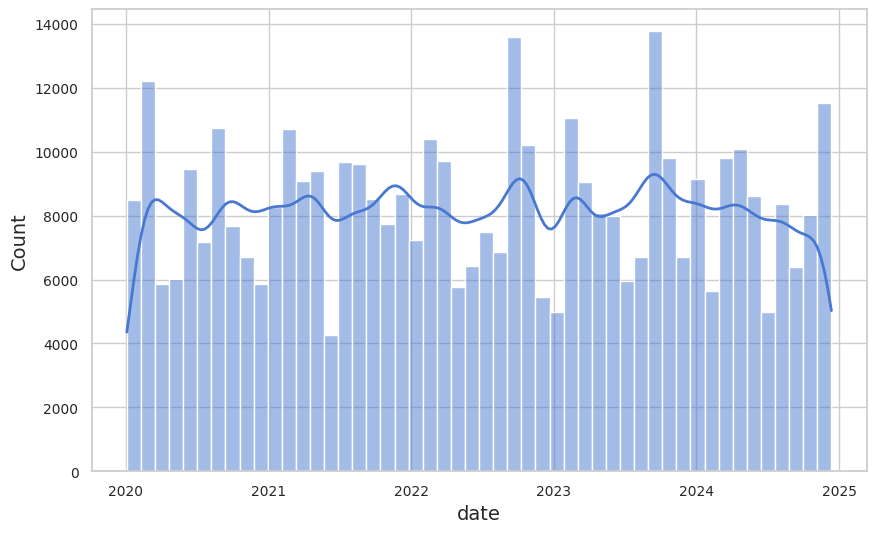

In [26]:
num_invoice = raw_des_moines_df.group_by('invoice_line_no', 'date').agg(pl.n_unique('invoice_line_no').alias('num_invoice'))

sns.histplot(num_invoice, x="date", bins=50, kde=True)

The graph displays the distribution of invoice counts over time from 2020 to 2025. The histogram bars represent the number of invoices per time interval, while the KDE (Kernel Density Estimate) curve highlights the smoothed trend. Invoice counts generally remain steady throughout the period, showing consistent consumer demand for liquor in Des Moines.

In [28]:
print("In DES MOINES city have "+ str(raw_des_moines_df.n_unique("category_name")) + " categories")

raw_des_moines_df.group_by("category_name").count().sort("count", descending=True)[:10]

In DES MOINES city have 48 categories


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-8be2a6a6076d>:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  raw_des_moines_df.group_by("category_name").count().sort("count", descending=True)[:10]


category_name,count
str,u32
"""AMERICAN VODKAS""",63995
"""CANADIAN WHISKIES""",29823
"""100% AGAVE TEQUILA""",29794
"""AMERICAN FLAVORED VODKA""",25029
"""STRAIGHT BOURBON WHISKIES""",24415
"""WHISKEY LIQUEUR""",21914
"""IMPORTED BRANDIES""",15211
"""AMERICAN BRANDIES""",14872
"""BLENDED WHISKIES""",12865


Vodka (American and flavored) and whiskies dominate the market, reflecting mainstream consumer preferences. Retailers should prioritize these categories for stock and promotions. The strong 100% Agave Tequila suggests an opportunity for growth, likely driven by shifts in consumer trends favoring tequila-based cocktails. The range of categories demonstrates the diversity of consumer preferences, from mainstream products like vodka to specialty items like brandies and spiced rum.

#### Step 4. Generate basket market data

We need to first review the dataset before performing MBA. Here is to preprocess and transform the raw Des Moines dataset to analyze customer purchase behaviors, specifically focusing on the combinations of liquor categories and product descriptions in purchase "baskets."

In [29]:
raw_des_moines_df = raw_des_moines_df.filter(pl.col("category_name").is_not_null())


df_unstacked = raw_des_moines_df.group_by("name", "date")\
                            .agg([
                                    pl.col("category_name").unique().implode().alias("cat_basket_buckets"),
                                    pl.col("im_desc").unique().implode().alias("prod_basket_buckets"),
                                    ])
df_unstacked = df_unstacked.with_columns(pl.col('cat_basket_buckets').list.get(0).alias('cat_basket_buckets'))
df_unstacked = df_unstacked.with_columns(pl.col('prod_basket_buckets').list.get(0).alias('prod_basket_buckets'))

df_unstacked = df_unstacked.with_columns([
    pl.col("cat_basket_buckets").list.len().alias("cat_basket_buckets_cnt"),
    pl.col("prod_basket_buckets").list.len().alias("prod_basket_buckets_cnt")
])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df_unstacked.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


statistic,name,date,cat_basket_buckets,prod_basket_buckets,cat_basket_buckets_cnt,prod_basket_buckets_cnt
str,str,str,f64,f64,f64,f64
"""count""","""9752""","""9752""",9752.0,9752.0,9752.0,9752.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0
"""mean""",null,"""2022-07-14 12:53:18.359311""",null,null,14.939192,37.467289
"""std""",null,null,null,null,8.157189,35.432322
"""min""","""1ST STOP BEVERAGE SHOP""","""2020-01-04 00:00:00""",null,null,1.0,1.0
"""25%""",null,"""2021-05-02 00:00:00""",null,null,9.0,16.0
"""50%""",null,"""2022-08-02 00:00:00""",null,null,14.0,29.0
"""75%""",null,"""2023-10-07 00:00:00""",null,null,20.0,45.0
"""max""","""WORLD LIQUOR & TOBACCO + VAPOR…","""2024-12-12 00:00:00""",null,null,43.0,769.0


In [31]:
over_1_df_egreater2021 = df_unstacked.filter(pl.col('cat_basket_buckets_cnt')>1)

unique_cats_egreater2021 = over_1_df_egreater2021.explode('cat_basket_buckets').select('cat_basket_buckets').unique().to_pandas()["cat_basket_buckets"].to_list()

cats_basket = (
    over_1_df_egreater2021
    .with_columns([
        pl.col("cat_basket_buckets").list.contains(cat).cast(pl.Int8).alias(cat)
        for cat in unique_cats_egreater2021
    ]))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3. Appriori algorithm analysis in category name

In [33]:
cats_basket = pd.read_parquet("/content/liquor_cat_basket_desmoines.parquet")

cats_basket.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,cat_basket_buckets_cnt,prod_basket_buckets_cnt,AMERICAN BRANDIES,FLAVORED GIN,IRISH WHISKIES,CANADIAN WHISKIES,AMERICAN FLAVORED VODKA,IMPORTED DRY GINS,IMPORTED DISTILLED SPIRITS SPECIALTY,...,BOTTLED IN BOND BOURBON,STRAIGHT RYE WHISKIES,SINGLE BARREL BOURBON WHISKIES,BLENDED WHISKIES,NEUTRAL GRAIN SPIRITS,AMERICAN DISTILLED SPIRITS SPECIALTY,IMPORTED CORDIALS & LIQUEURS,AGED DARK RUM,IMPORTED SCHNAPPS,MEZCAL
count,9365,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,...,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000
mean,2022-07-11 22:41:07.143000,15.515216,38.958142,0.602990,0.052643,0.322477,0.840683,0.655312,0.224346,0.090230,...,0.062467,0.197651,0.064495,0.573732,0.065777,0.086385,0.490230,0.114469,0.191991,0.079658
min,2020-01-04 00:00:00,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-05-01 00:00:00,10.000000,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-07-11 00:00:00,14.000000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-10-07 00:00:00,20.000000,46.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2024-12-12 00:00:00,43.000000,769.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,7.805620,35.373427,0.489304,0.223331,0.467449,0.365991,0.475292,0.417173,0.286526,...,0.242014,0.398249,0.245647,0.494560,0.247905,0.280947,0.499931,0.318397,0.393887,0.270778


In [34]:
cats_basket[:5]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,date,cat_basket_buckets,prod_basket_buckets,cat_basket_buckets_cnt,prod_basket_buckets_cnt,AMERICAN BRANDIES,FLAVORED GIN,IRISH WHISKIES,CANADIAN WHISKIES,...,BOTTLED IN BOND BOURBON,STRAIGHT RYE WHISKIES,SINGLE BARREL BOURBON WHISKIES,BLENDED WHISKIES,NEUTRAL GRAIN SPIRITS,AMERICAN DISTILLED SPIRITS SPECIALTY,IMPORTED CORDIALS & LIQUEURS,AGED DARK RUM,IMPORTED SCHNAPPS,MEZCAL
0,KUM & GO #573 / SE 14TH DM,2022-04-03,"[AMERICAN BRANDIES, AMERICAN FLAVORED VODKA, IMPORTED CORDIALS & LIQUEURS, AMERICAN VODKAS, MIXTO TEQUILA, CREAM LIQUEURS, WHISKEY LIQUEUR, AMERICAN DRY GINS, CANADIAN WHISKIES, IMPORTED BRANDIES]","[HAWKEYE VODKA MINI, E & J VS, JAGERMEISTER LIQUEUR, MCCORMICK 80PRF VODKA PET, JOSE CUERVO ESPECIAL REPOSADO, CROWN ROYAL REGAL APPLE, RUMCHATA MINI, JOSE CUERVO ESPECIAL REPOSADO MINI, NEW AMSTERDAM PEACH, FIREBALL CINNAMON WHISKEY, SEAGRAMS EXTRA DRY GIN MINI, HENNESSY VS, JOSE CUERVO ESPECIAL REPOSADO FLASK, CROWN ROYAL, NEW AMSTERDAM 80PRF MINI]",10,15,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,HY-VEE FOOD STORE #2 / DES MOINES,2021-04-11,"[STRAIGHT RYE WHISKIES, AMERICAN BRANDIES, BLENDED WHISKIES, FLAVORED GIN, SCOTCH WHISKIES, AMERICAN SCHNAPPS, WHISKEY LIQUEUR, 100% AGAVE TEQUILA, FLAVORED RUM, AGED DARK RUM, CANADIAN WHISKIES, IRISH WHISKIES, AMERICAN FLAVORED VODKA, IMPORTED BRANDIES, WHITE RUM, MIXTO TEQUILA, NEUTRAL GRAIN SPIRITS FLAVORED, TEMPORARY & SPECIALTY PACKAGES, COCKTAILS/RTD, AMERICAN CORDIALS & LIQUEURS, TENNESSEE WHISKIES, COFFEE LIQUEURS, SPICED RUM, STRAIGHT BOURBON WHISKIES, AMERICAN DRY GINS, AMERICAN VODKAS]","[CANADIAN CLUB SMALL BATCH CLASSIC, BACARDI SUPERIOR, E & J VS, CAPTAIN MORGAN ORIGINAL SPICED MINI, FIREBALL CINNAMON WHISKEY, REVEL STOKE NUTCRUSHER PEANUT BUTTER WHISKY, TEN HIGH, WINDSOR CANADIAN PET, ADMIRAL NELSON SPICED, BLUE OX SILVER RUM, SMIRNOFF SPICY TAMARIND, JOSE CUERVO ESPECIAL REPOSADO MINI, ST REMY VSOP NAPOLEON BRANDY, PARAMOUNT CHERRY BRANDY, CAPTAIN MORGAN LONG ISLAND ICED TEA, 360 DOUBLE CHOCOLATE, PARAMOUNT PEACH SCHNAPPS, OLE SMOKY SALTY WATERMELON WHISKEY, ARROW BLACKBERRY BRANDY, SMIRNOFF KISSED CARAMEL, LAUDERS, OLE SMOKY SALTY CARAMEL WHISKEY, BACARDI BAHAMA MAMA RTS, DEKUYPER LUSCIOUS PEACHTREE, JOSE CUERVO AUTHENTIC MANGO MARGARITA, TOOTERS BLU-DACIOUS KAMIKAZI MINI, SMIRNOFF ZERO SUGAR INFUSION WATERMELON & MINT, ON THE ROCKS COCKTAILS HORNITOS MARGARITA, BARTON VODKA, EVAN WILLIAMS HONEY, FIREBALL CINNAMON WHISKEY MINI DISPENSER, JOSE CUERVO AUTHENTIC PINK LEMONADE MARGARITA, SMIRNOFF CITRUS, PARAMOUNT AMARETTO, PARAMOUNT GIN, MCCORMICK 80PRF VODKA PET, KAHLUA COFFEE, PHILLIPS VODKA, CROWN ROYAL PEACH, BLUE OX VODKA, SMIRNOFF VANILLA, WOODFORD RESERVE, POPOV 80PRF, SOUTHERN HOST WHISKEY LIQUEUR, HAWKEYE VODKA, UV BLUE RASPBERRY, BURN THE BOATS RYE WHISKEY, SOUTHERN COMFORT 100PRF, REVELTON MULBERRY GIN, CH-CHI'S PEACH MARGARITA, UV RED CHERRY MINI, JIM BEAM APPLE MINI, ADMIRAL NELSON COCONUT, FLEISCHMANNS GIN, CRUZAN DARK, MARGARITAVILLE CLASSIC LIME MARGARITA, DEEP EDDY ORANGE, HAWKEYE LIGHT RUM, 99 STRAWBERRIES MINI, MILAGRO SILVER, SEAGRAMS EXTRA SMOOTH VODKA, BIRD DOG PEACH, GEORGE DICKEL RYE, JAMESON BLACK BARREL, UV BLUE RASPBERRY MINI]",26,65,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
2,"CENTRAL CITY LIQUOR, INC.",2022-04-03,"[100% AGAVE TEQUILA, IMPORTED CORDIALS & LIQUEURS, SCOTCH WHISKIES, IMPORTED DISTILLED SPIRITS SPECIALTY, CANADIAN WHISKIES, IMPORTED BRANDIES, AMERICAN CORDIALS & LIQUEURS, FLAVORED RUM, STRAIGHT BOURBON WHISKIES, AMERICAN VODKAS, MIXTO TEQUILA]","[BUCHANAN SPECIAL RESERVE 18YR, ST REMY VSOP NAPOLEON BRANDY, MCCORMICK 80PRF VODKA PET, PHILLIPS VODKA, SAUZA GOLD, JOSE CUERVO ESPECIAL REPOSADO, CANADIAN CLUB WHISKY, LAGAVULIN 8YR, CROWN ROYAL REGAL APPLE, 1800 SILVER, DI AMORE AMARETTO, SOOH JINRO CHAMISUL CLASSIC SOJU, LUXARDO MARASCHINO CHERRY, DAVIESS COUNTY KSBW CAB FINISHED, MALIBU COCONUT]",11,15,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,821 SQ LIQUOR / DES MOINES,2022-10-09,"[AMERICAN DISTILLED SPIRITS SPECIALTY, SINGLE BARREL BOURBON WHISK

Each row represents a basket or transaction, grouped by store name (name) and transaction date (date).

The dataset includes:

cat_basket_buckets: A list of liquor categories included in the basket.

prod_basket_buckets: A list of individual products purchased in the basket.

cat_basket_buckets_cnt: The number of unique liquor categories in the basket.

prod_basket_buckets_cnt: The number of unique products in the basket.

Binary columns indicate whether a specific liquor category is present in the basket (1 for presence, 0 for absence).

## 3.1. Choices of Support & Confidence value

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py

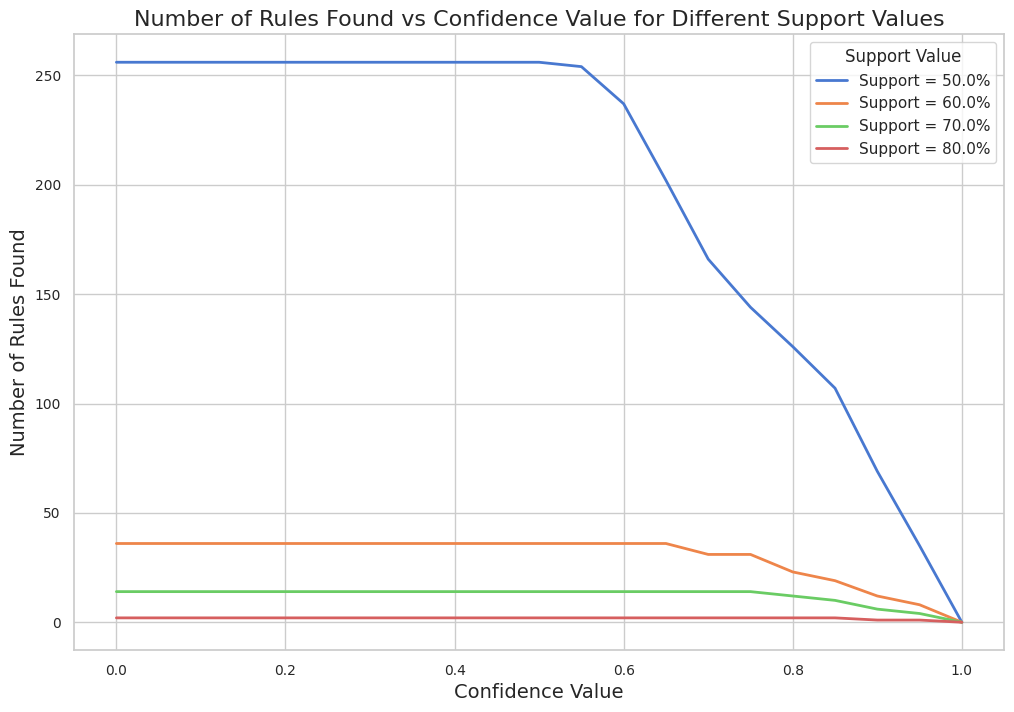

In [35]:
support_values = [0.5, 0.6, 0.7, 0.8]
confidence_values = [i/100 for i in range(0, 101, 5)]

rules_count = {support: [] for support in support_values}

for support in support_values:
    # Apply Apriori algorithm
    frequent_itemsets = apriori(cats_basket.iloc[:, 6:], min_support=support, use_colnames=True)

    for confidence in confidence_values:
        # Apply association rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence, num_itemsets=2)
        rules_count[support].append(len(rules))

plt.figure(figsize=(12, 8))
for support, counts in rules_count.items():
    plt.plot(confidence_values, counts, label=f'Support = {support*100}%')

plt.xlabel('Confidence Value')
plt.ylabel('Number of Rules Found')
plt.title('Number of Rules Found vs Confidence Value for Different Support Values')
plt.legend(title='Support Value')
plt.grid(True)
plt.show()

The process of generating association rules begins with determining appropriate thresholds for support and confidence. Selecting thresholds that are too low may significantly increase computational time and result in an excessive number of rules, many of which may lack practical relevance. To address this, an iterative approach can be employed, testing various combinations of support and confidence values to evaluate their impact on the number of generated rules. The following graphs illustrate the relationship between the number of rules produced and support levels set at 10%, 5%, 1%, and 0.5%.

## 3.2. Frequent Itemsets with Incomplete Antecedent and Consequent Information

Most of the metrics computed by the association_rules function are based on the support scores of the antecedent and consequent within a specific rule. These support scores are provided in the dataframe input containing the frequent itemsets. Here's an example to illustrate:

In [36]:
frequent_itemsets = apriori(cats_basket.iloc[:, 6:], min_support=0.6, use_colnames=True).sort_values("support", ascending=False)
frequent_itemsets[:5]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
5,0.923865,(AMERICAN VODKAS)
1,0.840683,(CANADIAN WHISKIES)
10,0.809290,"(AMERICAN VODKAS, CANADIAN WHISKIES)"
3,0.794661,(WHISKEY LIQUEUR)
13,0.772771,"(AMERICAN VODKAS, WHISKEY LIQUEUR)"



The table highlights frequent itemsets and their corresponding support values within the dataset, indicating the relative frequency of these combinations in transactions. Below are insights derived from these itemsets:

* Dominance of American Vodkas (Support: 0.923865): American Vodkas have the highest support value, indicating they are purchased in over 92% of the transactions analyzed. This suggests they are a staple product in the market and should be prioritized for inventory management and marketing campaigns.
* Canadian Whiskies (Support: 0.840683): Canadian Whiskies have a strong presence, appearing in 84% of transactions. This emphasizes their popularity and complements American Vodkas as a key product category.
* Combination of Canadian Whiskies and American Vodkas (Support: 0.809290): The frequent co-occurrence of these two categories in over 80% of transactions indicates a strong association between them. Retailers can use this insight to create bundled promotions or strategically place these items together to encourage cross-selling.
* Whiskey Liqueur (Support: 0.794661): Whiskey Liqueur is another popular category, appearing in nearly 79% of transactions. This product's high support suggests its importance in meeting customer demand and its potential for integration into promotional strategies.
* Combination of American Vodkas and Whiskey Liqueur (Support: 0.772771): This combination's support value of 77% highlights its significance. Retailers might explore pairing these items in product displays or offering discounts on this combination to increase sales.

In [37]:
cats_basket_ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=2).sort_values("lift",ascending=False).reset_index(drop=True)
cats_basket_ar[:5]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(AMERICAN VODKAS, CANADIAN WHISKIES)",(WHISKEY LIQUEUR),0.809290,0.794661,0.706674,0.873202,1.098836,1.0,0.063563,1.619422,0.471639,0.787576,0.382496,0.881240
1,(WHISKEY LIQUEUR),"(AMERICAN VODKAS, CANADIAN WHISKIES)",0.794661,0.809290,0.706674,0.889277,1.098836,1.0,0.063563,1.722408,0.438038,0.787576,0.419418,0.881240
2,"(AMERICAN VODKAS, WHISKEY LIQUEUR)",(CANADIAN WHISKIES),0.772771,0.840683,0.706674,0.914467,1.087767,1.0,0.057018,1.862640,0.355083,0.779322,0.463128,0.877531
3,(CANADIAN WHISKIES),"(AMERICAN VODKAS, WHISKEY LIQUEUR)",0.840683,0.772771,0.706674,0.840594,1.087767,1.0,0.057018,1.425478,0.506445,0.779322,0.298481,0.877531
4,(WHISKEY LIQUEUR),"(AMERICAN VODKAS, STRAIGHT BOURBON WHISKIES)",0.794661,0.702616,0.603737,0.759742,1.081305,1.0,0.045396,1.237769,0.366181,0.675669,0.192095,0.809506


## 3.3. Execute the chose rule

Apply association rules

In [38]:
rule_counts = {index: 0 for index in range(len(cats_basket_ar))}

for index, row in cats_basket_ar.iterrows():
    antecedents = set(row['antecedents'])
    consequents = set(row['consequents'])

    for _, invoice in cats_basket.iterrows():
        invoice_items = set(invoice["cat_basket_buckets"])

        if antecedents.issubset(invoice_items) and consequents.issubset(invoice_items):
            rule_counts[index] += 1

rule_counts_df = pd.DataFrame(list(rule_counts.items()), columns=['Rule Index', 'Invoice Count'])

total_invoice_count = rule_counts_df['Invoice Count'].sum()

rule_counts_df['Percentage'] = (rule_counts_df['Invoice Count'] / total_invoice_count) * 100

rule_counts_df[:5]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rule Index,Invoice Count,Percentage
0,0,6618,2.949356
1,1,6618,2.949356
2,2,6618,2.949356
3,3,6618,2.949356
4,4,5654,2.519743


In [39]:
cats_basket_ar = cats_basket_ar.reset_index(drop=False)
cats_basket_ar.rename(columns={'index': 'Rule Index'}, inplace=True)
cats_basket_ar.sort_values("lift", ascending=False, inplace=True)
cats_basket_ar = cats_basket_ar.merge(rule_counts_df, on='Rule Index', how='left')
cats_basket_ar[:5]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rule Index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,Invoice Count,Percentage
0,0,"(AMERICAN VODKAS, CANADIAN WHISKIES)",(WHISKEY LIQUEUR),0.809290,0.794661,0.706674,0.873202,1.098836,1.0,0.063563,1.619422,0.471639,0.787576,0.382496,0.881240,6618,2.949356
1,1,(WHISKEY LIQUEUR),"(AMERICAN VODKAS, CANADIAN WHISKIES)",0.794661,0.809290,0.706674,0.889277,1.098836,1.0,0.063563,1.722408,0.438038,0.787576,0.419418,0.881240,6618,2.949356
2,2,"(AMERICAN VODKAS, WHISKEY LIQUEUR)",(CANADIAN WHISKIES),0.772771,0.840683,0.706674,0.914467,1.087767,1.0,0.057018,1.862640,0.355083,0.779322,0.463128,0.877531,6618,2.949356
3,3,(CANADIAN WHISKIES),"(AMERICAN VODKAS, WHISKEY LIQUEUR)",0.840683,0.772771,0.706674,0.840594,1.087767,1.0,0.057018,1.425478,0.506445,0.779322,0.298481,0.877531,6618,2.949356
4,4,(WHISKEY LIQUEUR),"(AMERICAN VODKAS, STRAIGHT BOURBON WHISKIES)",0.794661,0.702616,0.603737,0.759742,1.081305,1.0,0.045396,1.237769,0.366181,0.675669,0.192095,0.809506,5654,2.519743


From the table we can observe that based on metrics-based Lift, Support, Confidence rules:
* Lift Values Indicating Weak to Moderate Association:
Lift values slightly above 1 (e.g., 1.09 for WHISKEY LIQUEUR -> AMERICAN VODKAS) suggest a weak but positive association between the antecedent and consequent items. While these products are often bought together, their relationship might not be as strong as confidence alone suggests.
* Strong Support for Antecedent and Consequent Itemsets:
Items like WHISKEY LIQUEUR and CANADIAN WHISKIES have consistently high support, reflecting their frequent presence in transactions. This makes these products critical for driving sales and maintaining inventory.
* Conviction Values Highlighting Rule Reliability: Conviction values above 1 (e.g., 1.86 for AMERICAN VODKAS, WHISKEY LIQUEUR -> CANADIAN WHISKIES) indicate that the rules are reliable predictors of co-purchase behavior and less prone to random occurrences.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rule Index,rule_name,confidence
14,14,"frozenset({'WHISKEY LIQUEUR', 'STRAIGHT BOURBON WHISKIES'}) -> frozenset({'AMERICAN VODKAS'})",0.985876
16,16,"frozenset({'WHISKEY LIQUEUR', 'CANADIAN WHISKIES'}) -> frozenset({'AMERICAN VODKAS'})",0.983358
19,18,"frozenset({'STRAIGHT BOURBON WHISKIES', 'CANADIAN WHISKIES'}) -> frozenset({'AMERICAN VODKAS'})",0.980930
20,20,frozenset({'SPICED RUM'}) -> frozenset({'AMERICAN VODKAS'}),0.980927
26,26,frozenset({'WHISKEY LIQUEUR'}) -> frozenset({'AMERICAN VODKAS'}),0.972454
28,28,frozenset({'AMERICAN FLAVORED VODKA'}) -> frozenset({'AMERICAN VODKAS'}),0.968714
31,31,frozenset({'STRAIGHT BOURBON WHISKIES'}) -> frozenset({'AMERICAN VODKAS'}),0.962833
32,32,frozenset({'CANADIAN WHISKIES'}) -> frozenset({'AMERICAN VODKAS'}),0.962657
35,35,frozenset({'100% AGAVE TEQUILA'}) -> frozenset({'AMERICAN VODKAS'}),0.936376
2,2,"frozenset({'AMERICAN VODKAS', 'WHISKEY LIQUEUR'}) -> frozenset({'CANADIAN WHISKIES'})",0.914467


<ipython-input-40-8741a94db7ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rule Index', y='confidence', data=top_10_rules_by_conf, palette="viridis")


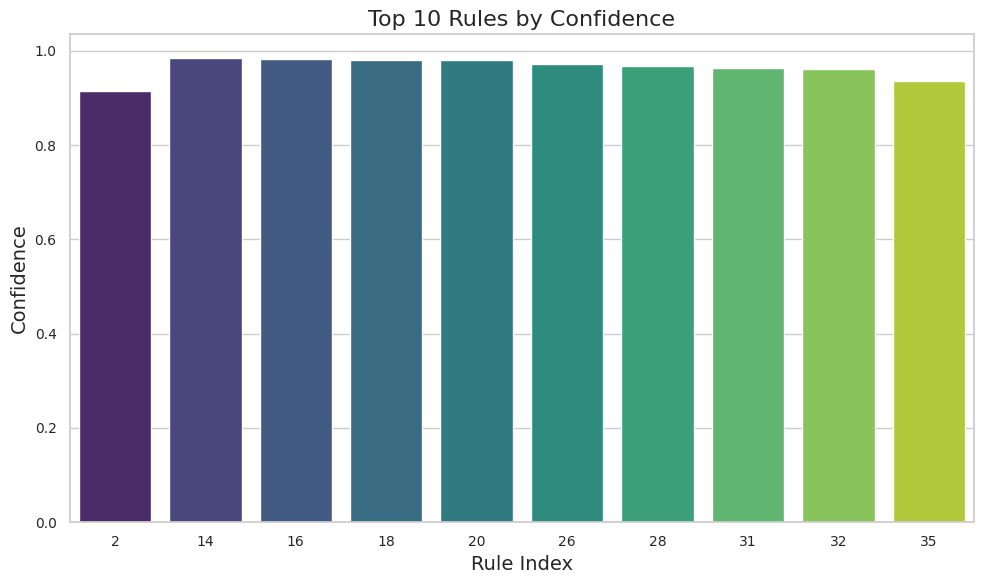

In [40]:
top_10_rules_by_conf = cats_basket_ar.sort_values(by='confidence', ascending=False).head(10)
top_10_rules_by_conf["rule_name"] = top_10_rules_by_conf.apply(lambda x: f"{x['antecedents']} -> {x['consequents']}", axis=1)

display(top_10_rules_by_conf[['Rule Index','rule_name', 'confidence']])

sns.barplot(x='Rule Index', y='confidence', data=top_10_rules_by_conf, palette="viridis")
plt.title('Top 10 Rules by Confidence')
plt.xlabel('Rule Index')
plt.ylabel('Confidence')

plt.tight_layout()
plt.show()

The association rules generated from the dataset reveal significant patterns in the purchasing behavior of liquor products.


*   American Vodkas as a Central Product: Many of the identified rules highlight American Vodkas as a common product in transactions. For instance, the rule WHISKEY LIQUEUR → AMERICAN VODKAS demonstrates a confidence level of 98.58%, indicating that customers who purchase Whiskey Liqueur are highly likely to include American Vodkas in their baskets. This underscores the pivotal role of American Vodkas as a core product within the market.


*  Frequent Pairings of Canadian Whiskies and Whiskey Liqueur: High-confidence rules, such as CANADIAN WHISKIES, STRAIGHT BOURBON WHISKIES → AMERICAN VODKAS with a confidence of 98.09%, suggest strong co-purchasing trends among these categories. This insight provides an opportunity for retailers to design targeted promotions or bundle offers featuring these complementary items to boost sales.


*   Cross-Category Associations with Strong Confidence: Products like STRAIGHT BOURBON WHISKIES and SPICED RUM also demonstrate strong associations with American Vodkas, as evidenced by high-confidence rules. These patterns may reflect a specific segment of consumers with distinct preferences, presenting an opportunity for personalized marketing or product sales optimization.





## 3.4. Visualize executed rules

We will start with a scatter plot, using lift and support as the axes, while representing a third measure, confidence, through the color of the data points.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


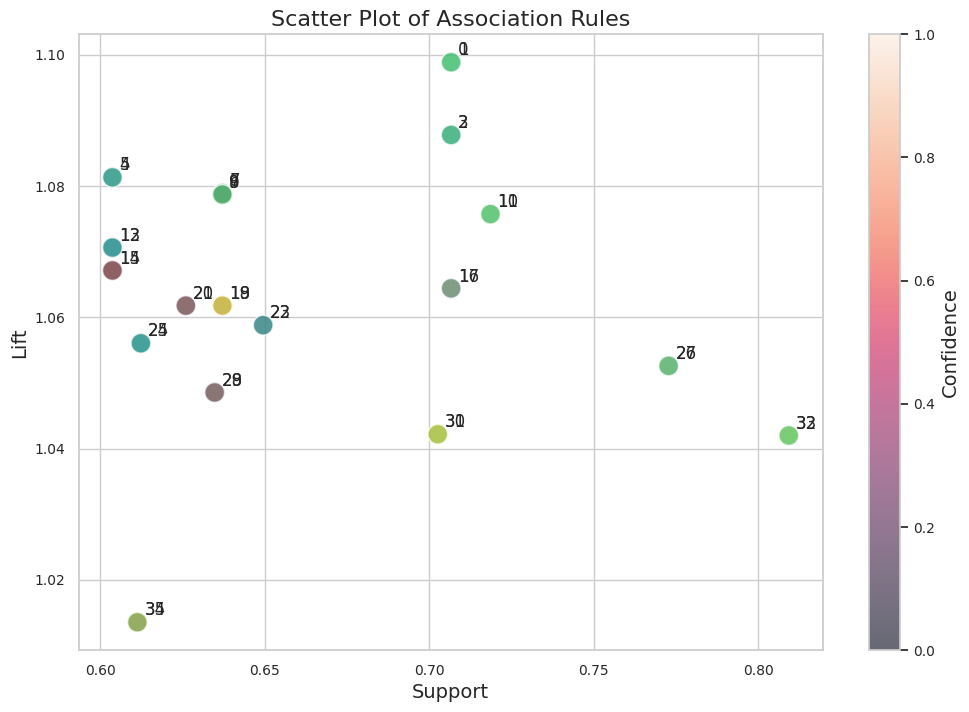

In [41]:
import matplotlib.pyplot as plt
import numpy as np

norm = plt.Normalize(cats_basket_ar['confidence'].min(), cats_basket_ar['confidence'].max())
colors = plt.cm.viridis(norm(cats_basket_ar['confidence']))

plt.figure(figsize=(12, 8))
scatter = plt.scatter(cats_basket_ar['support'], cats_basket_ar['lift'], c=colors, alpha=0.6, edgecolors='w', s=200)  # Increased size

plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Scatter Plot of Association Rules')
plt.grid(True)

for i, txt  in enumerate(cats_basket_ar['Rule Index']):
    plt.annotate(txt, (cats_basket_ar['support'][i], cats_basket_ar['lift'][i]),  xytext=(5, 5), textcoords='offset points')

cbar = plt.colorbar(scatter)
cbar.set_label('Confidence')

plt.show()

It is believed that high-lift, high-confidence rules (top-left quadrant) are most valuable for specific marketing efforts, as they highlight strong associations even among less frequent transactions.
Rules with high support but moderate lift (top-right) are essential for broad operational strategies, such as inventory management for commonly co-purchased items.
Evaluating a combination of support, confidence, and lift ensures a balanced interpretation of frequent and meaningful item relationships.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


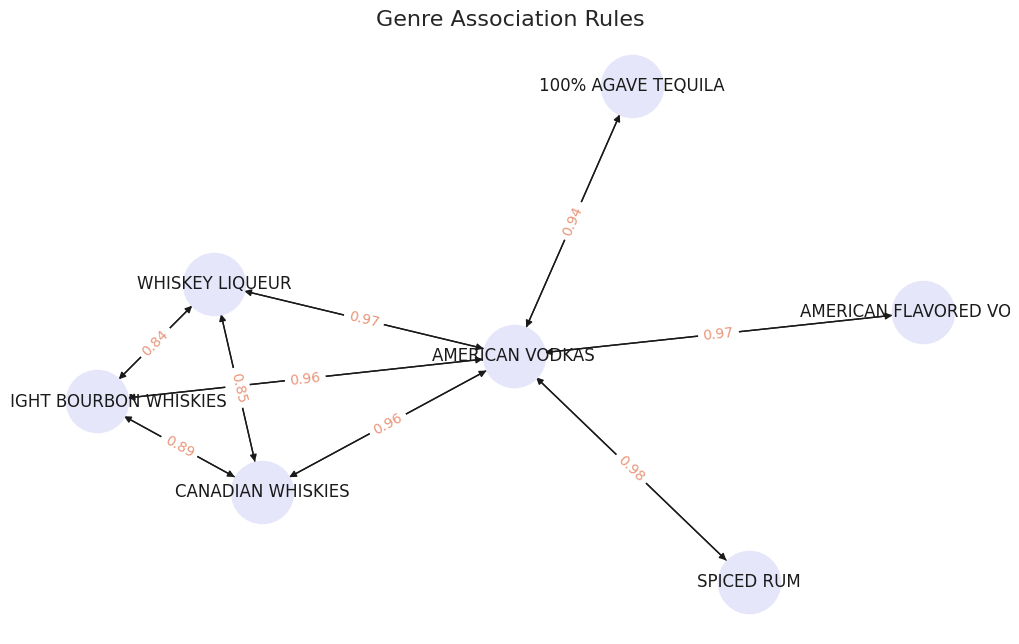

In [42]:
G = nx.DiGraph()


for index, row in cats_basket_ar.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    weight = row['confidence']
    G.add_edge(antecedent, consequent, weight=weight)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='lavender', node_size=2000)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darksalmon')

plt.title("Genre Association Rules")
plt.show()

From the graph, we can analyze that:
* Central Role of American Vodkas:
American Vodkas serve as the central node in this network, indicating their pivotal role in association rules. Multiple liquor categories, such as Spiced Rum, 100% Agave Tequila, and American Flavored Vodka, point toward American Vodkas with high confidence values (e.g., 0.98 and 0.94). This suggests that American Vodkas are frequently co-purchased with a variety of other liquor types, making them an essential product for cross-selling strategies.

* Strong Pairings:
Whiskey Liqueur and Canadian Whiskies demonstrate a bidirectional relationship, with confidence values of 0.85 and 0.89. This indicates a strong mutual association where the purchase of one often predicts the other.
Straight Bourbon Whiskies and American Vodkas also exhibit a high-confidence relationship (0.96), showing a reliable association that retailers can leverage.

* Niche but Reliable Links:
While Spiced Rum and 100% Agave Tequila are not as interconnected with other categories, their direct links to American Vodkas with high confidence (0.98 and 0.94) reveal strong but niche associations. These rules highlight specific customer preferences that may be targeted through strategic marketing or bundling.
Secondary Relationships:
The indirect connections, such as between Whiskey Liqueur and Straight Bourbon Whiskies (0.84), indicate additional opportunities for cross-selling, especially when combined with the central role of American Vodkas.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


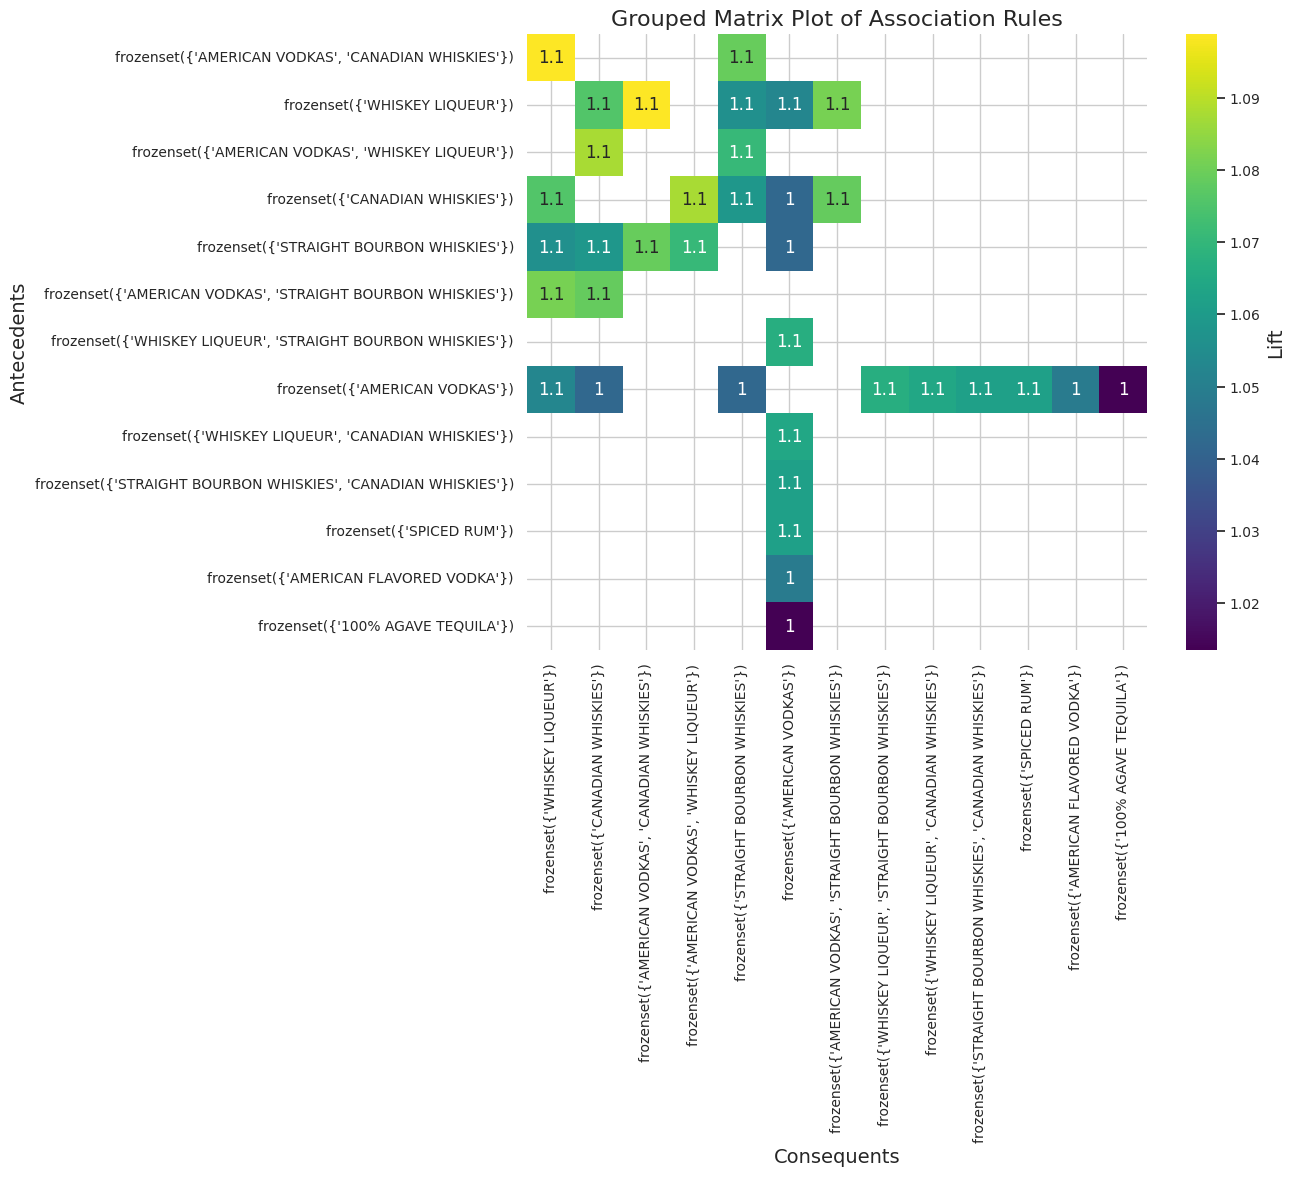

In [43]:
pivot = cats_basket_ar.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap="viridis", cbar_kws={'label': 'Lift'})
plt.title('Grouped Matrix Plot of Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

This grouped matrix plot represents association rules in terms of their antecedents and consequents, with the color gradient indicating the lift values. Lift measures the strength of the association between the antecedent and consequent items relative to their independent occurrence.

* Strong Associations (Lift = 1.1):

Many associations in the matrix have a lift value of 1.1, highlighted in yellow, indicating moderate but reliable associations between itemsets. For example:
Whiskey Liqueur and American Vodkas have a strong bidirectional relationship.
Straight Bourbon Whiskies frequently co-occurs with both American Vodkas and Whiskey Liqueur, emphasizing its importance as a bridge between these categories.

* Moderate Associations (Lift ~1.05 - 1.07):

The teal and blue-colored cells represent associations with moderate lift values, such as:
Spiced Rum and American Vodkas.
100% Agave Tequila and American Vodkas.
These relationships, while not as strong as the yellow-highlighted rules, indicate significant niche purchasing patterns that can inform targeted marketing or product placement.

* Central Role of American Vodkas:

American Vodkas consistently appear as a consequential product in multiple rules, reflecting their strong association with various antecedents, including:
Canadian Whiskies, Whiskey Liqueur, and Straight Bourbon Whiskies.
This reaffirms American Vodkas as a key product with cross-category appeal.

* Bidirectional Associations:

The matrix also highlights reciprocal relationships, such as between Whiskey Liqueur and Canadian Whiskies. These associations suggest strong customer tendencies to purchase these products together, making them ideal candidates for bundling or cross-promotions.

# 4. Conclusion


The analysis of association rules in the Iowa Liquor Retail Sales dataset provides both expected and valuable insights into customer purchasing behavior.

Through this project, the author targeted to leverage MBA to uncover intricate connections and consumer preferences within the liquor retail space. These insights hold significant potential for transforming how retailers approach inventory management, product placement, and promotional strategies.

For liquor retailers, the discovered patterns offer a strategic roadmap to optimize operations and enhance the overall shopping experience. By tailoring product assortments and marketing efforts based on data-driven insights, businesses can create a more personalized and efficient retail environment that resonates with consumer needs and preferences.

This project highlights the critical role of data analytics in the liquor retail industry, advocating for a shift toward customer-centric decision-making. By anticipating and aligning with evolving consumer behavior, retailers can position themselves not only to remain competitive but to foster growth, improve customer satisfaction, and build lasting loyalty in a dynamic marketplace.

Furthermore, it can stand a reason for the business implications as:
* The strong associations, particularly those with higher lift values (1.1), can be leveraged to design effective promotional strategies, such as bundling American Vodkas with complementary products like Whiskey Liqueur or Straight Bourbon Whiskies.
* Also, categories with moderate associations, such as Spiced Rum and 100% Agave Tequila, can inform inventory optimization in specific regions or during seasonal demand periods.
* Therefore, retailers can use these associations to strategically place items together, enhancing cross-selling opportunities and creating a seamless shopping experience.

#References

Fitzgerald, J. L., & Mulford, H. A. (1992). Alcohol Availability and Consumption: Iowa Sales Data Revisited. Journal of Studies on Alcohol, 53(5), 487-494.

Rakam.io. (2025). Insights into Iowa Liquor Sales Data.

Mulford, H. A., Ledolter, J., & Fitzgerald, J. L. (1992). Alcohol Availability and Consumption: Iowa Sales Data Revisited.

Wagenaar, A. C., & Holder, H. D. (1991). Effects of Alcohol Privatization on Alcohol Consumption: A Time-Series Intervention Analysis. Journal of Studies on Alcohol, 52(2), 162–173.